In [40]:
library("bigrquery")
install.packages("stringr")
library(stringr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [52]:
# source the config
source("/home/jupyter/digitaloptgroup-r-notebooks/config.R")

# Provide authentication through the JSON service account key
set_service_token(pathToServiceAccount)

sql <- str_interp(
'SELECT vid, SUM(ts.distance) as mouseDistanceAfterExposure, variationId, featureId
    FROM `${digitalOptGroupBQid}.${dataset}.mouseDistance` as ts 
    JOIN `${digitalOptGroupBQid}.${dataset}.variationInViewport` as v 
    USING(vid) 
    WHERE ts.timelineMark > v.timelineMark
    GROUP BY variationId, vid, featureId'
)

# Run the query and store the data in a dataframe
tb <- bq_project_query(query=sql,x=googleCloudProjectId)
df <- bq_table_download(tb)

In [53]:
head(df)

vid,mouseDistanceAfterExposure,variationId,featureId
bd2b7e80-4edb-4233-89c6-dd534e99861b,10223,a6e64c2b38d826a88ffcdf4f5625f663b038496c,db30fd494bc65dc42547e965bd05fc7e120b47b9
f65440d9-569e-4271-9cca-d98bb6532ea8,8321,23c01c2e082caee8a781fb5d5118154c2777ad73,f8bcc27fa8256db9e317bc6ce436390059daa99f
c0847204-5d2e-4c09-a85b-6050c96975ab,5940,360acdd4eb2acd221b9198de9352e6dbfe10f542,864cb97ed0367a49419e87df750fd211c9b24f5a
876e23c2-25a9-4900-9238-12b5eead1845,14432,29f58bf3d56a2928d43bc32930aa77bc46f81c17,b625881ad3dbde1a2ebb33a095e278fe530663d5
cf633e92-0f9a-44da-adce-ac3fe5001605,1447,7b21b886970385ad67873b59cc857e39385a29ad,76e318754a6a9051f0c8b174e10c711987d0eb50
1-5a65e8ae-5b91fe6f18749ccc0e7b4dae,55060,bfe48f446b4584f308831eebb39eebb9d2f445d8,c21f4a9edc6df855cde3dfb94917dccc6716b0ad


In [9]:
mouseDist <- df$mouseDistanceAfterExposure
summary(mouseDist)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
      11     4084    31334   464222   194505 25111955 

In [23]:
length(mouseDist)
sum(mouseDist < 50000) 

[1] 2734

[1] 1598

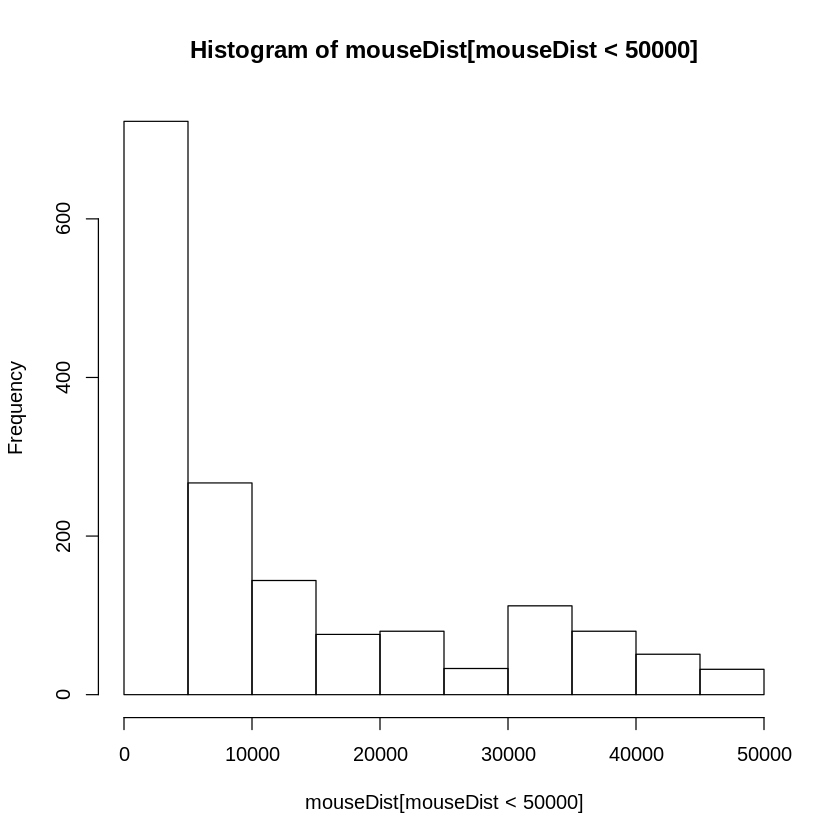

In [26]:
hist(mouseDist[mouseDist < 50000])